# Lab 2:  Exploratory Data Analysis (EDA) -- Visualization
## Author: Nigel Nelson
## Introduction: 
- This lab acts as an exercise in visualizing data to convey relationships between variables, as well as using graphical representations of data to interpret and rationalize why correlations may exist between variables. This lab builds off of *Lab 1: Data Cleaning* by using the resulting cleaned data set as the primary data set for this lab. The data set, *CleanedSacramentorealestatetransactions*, has 919 entries and 14 variables describing real estate transactions in California. This includes the **street** address, the **city**, the **zip**, the **state**, the numbers of **beds**, the number of **baths**, the square footage of residential space(**sq_ft**), the **type** of real estate, the **sale date**, the sale **price**, the **latitude**, the **longitude**, whether it is an **empty_lot**, and the **street_type**.
This lab approaches visualizing the data by separating variables into two segments, categorical and continuous variables. These two subsections are used to analyze potential relationships with one continuous variable in the data set, price, and one categorical variable in the data set, type. Appropriate plots are then used to describe the relationships between this mix of variable types in order visualize any possible correlations. Finally, these plots are analyzed and variables are determined to be predictive or not predictive, and hypothesis’s are offered as to why this may or may not be.


---
---
### Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

### Reading in Cleaned Sacramento Real Estate Transactions:

In [2]:
re_transactions = pd.read_csv('CleanedSacramentorealestatetransactions.csv', 
                              dtype={'city': 'category', 'zip': 'category',
                                     'state': 'category', 'beds': 'category',
                                     'baths': 'category', 'type': 'category',
                                     'street_type': 'category'})
re_transactions.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,ST
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,CT
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,DR


In [3]:
re_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   street       919 non-null    object  
 1   city         919 non-null    category
 2   zip          919 non-null    category
 3   state        919 non-null    category
 4   beds         919 non-null    category
 5   baths        919 non-null    category
 6   sq__ft       919 non-null    int64   
 7   type         919 non-null    category
 8   sale_date    919 non-null    object  
 9   price        919 non-null    int64   
 10  latitude     919 non-null    float64 
 11  longitude    919 non-null    float64 
 12  empty_lot    919 non-null    bool    
 13  street_type  919 non-null    category
dtypes: bool(1), category(7), float64(2), int64(2), object(2)
memory usage: 55.8+ KB


## Part I: Regression on Price

### Scatter plotting continuous variables vs. price:

Text(0.5, 1.0, 'Price vs. Square Feet for Real Estate')

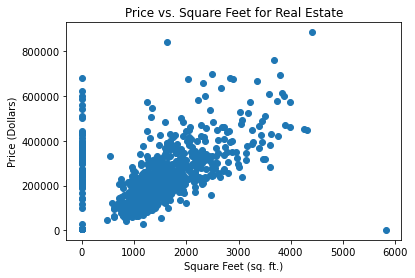

In [4]:
plt.scatter(re_transactions['sq__ft'], re_transactions['price'])
plt.xlabel('Square Feet (sq. ft.)')
plt.ylabel('Price (Dollars)')
plt.title('Price vs. Square Feet for Real Estate')

Text(0.5, 1.0, 'Price vs. Latitude for Real Estate')

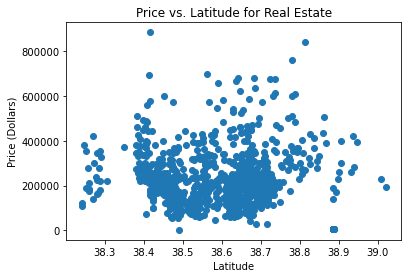

In [5]:
plt.scatter(re_transactions['latitude'], re_transactions['price'])
plt.xlabel('Latitude')
plt.ylabel('Price (Dollars)')
plt.title('Price vs. Latitude for Real Estate')

Text(0.5, 1.0, 'Price vs. Longitude for Real Estate')

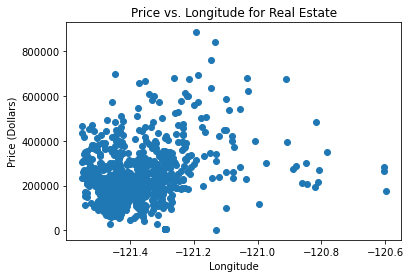

In [6]:
plt.scatter(re_transactions['longitude'], re_transactions['price'])
plt.xlabel('Longitude')
plt.ylabel('Price (Dollars)')
plt.title('Price vs. Longitude for Real Estate')

### Describing continuous variables as predictive of price or not:

- Scale: **-- | - | 0 | + | ++**
  - **--** is not predictive at all, **0** is indifferent, **++** is very predictive
  ---
  
  
- Square Feet: **+**
  - Square feet is somewhat predictive. The reason for this is that by analyzing the graph, a rough positive correlation can be seen. However, it is not a very tight grouping and by no means follows the identity line perfectly. In addition, square feet values of 0 are not included in the rough positive correlation.
- Latitude: **--**
  - Latitude is not predictive of the price variable at all. The scatter plot shows a clustered circle relatively centered in the plot, where there are a wide array of prices correlated with most all of the latitudes in the data set.
- Longitude: **0**
  - Longitude is indifferent in its ability to predict the price variable. The scatter plot shows a clustered circle in the left side of the plot, where there are a wide array of prices correlated with most all of the longitudes in the data set. The majority of Longitudes appear to be in values in the range (-121.6, -121.2), however for real estate whose Longitude was greater than -121.2, the price was usually greater than 200,000 dollars. Yet, the number of values found in this range are so few compared to the rest of the data set that this feature should not be relied upon to predict a price of greater than 200,000 dollars.

### Box plotting categorical variables vs. price:

Text(0.5, 1.0, 'Boxplot of Price vs. City')

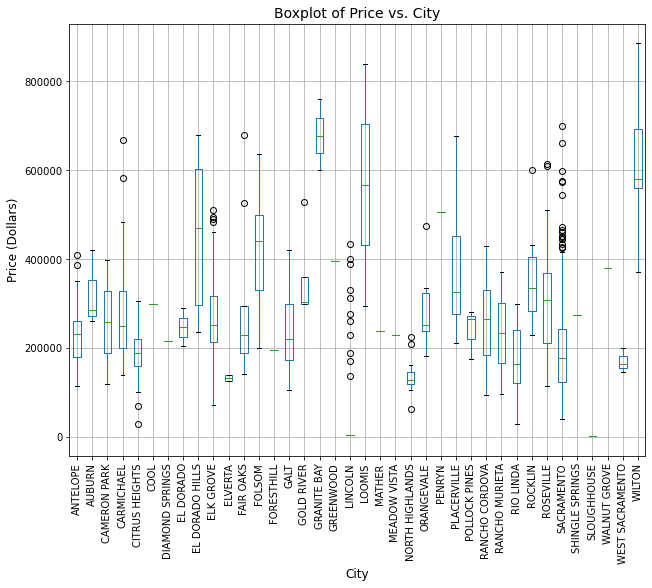

In [7]:
plt.rcParams["figure.figsize"] = (10,8)
re_transactions.boxplot(column='price', by='city')
plt.xticks(rotation=90)
plt.ylabel('Price (Dollars)', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.suptitle('')
plt.title('Boxplot of Price vs. City', fontsize=14)

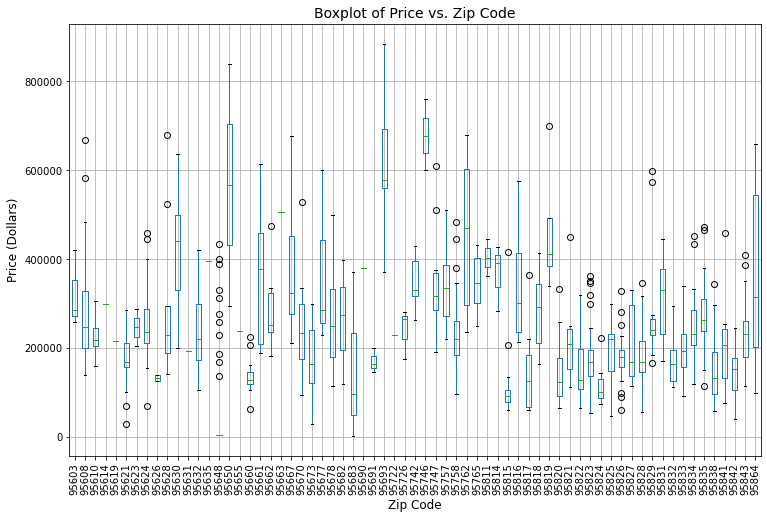

In [8]:
plt.rcParams["figure.figsize"] = (12,8)
re_transactions.boxplot(column='price', by='zip')
plt.xticks(rotation=90)
plt.ylabel('Price (Dollars)', fontsize=12)
plt.xlabel('Zip Code', fontsize=12)
plt.suptitle('')
plt.title('Boxplot of Price vs. Zip Code', fontsize=14)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Text(0.5, 1.0, 'Boxplot of Price vs. State')

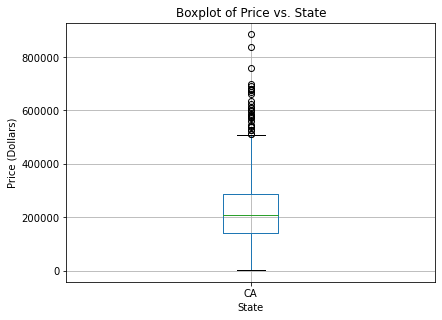

In [9]:
re_transactions.boxplot(column='price', by='state')
plt.ylabel('Price (Dollars)')
plt.xlabel('State')
plt.suptitle('')
plt.title('Boxplot of Price vs. State')

Text(0.5, 1.0, 'Boxplot of Price vs. Type of Real Estate')

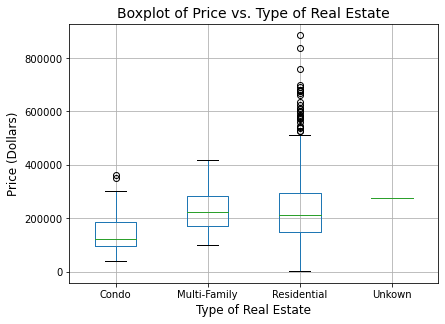

In [10]:
re_transactions.boxplot(column='price', by='type')
plt.ylabel('Price (Dollars)', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.suptitle('')
plt.title('Boxplot of Price vs. Type of Real Estate', fontsize=14)

Text(0.5, 1.0, 'Boxplot of Price vs. Number of Beds')

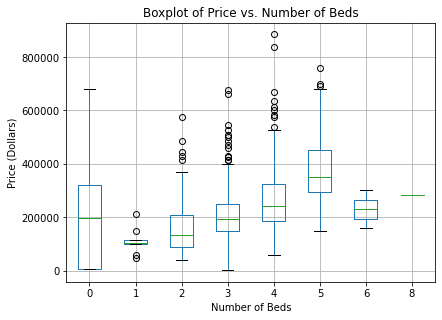

In [11]:
re_transactions.boxplot(column='price', by='beds')
plt.ylabel('Price (Dollars)')
plt.xlabel('Number of Beds')
plt.suptitle('')
plt.title('Boxplot of Price vs. Number of Beds')

Text(0.5, 1.0, 'Boxplot of Price vs. Number of Baths')

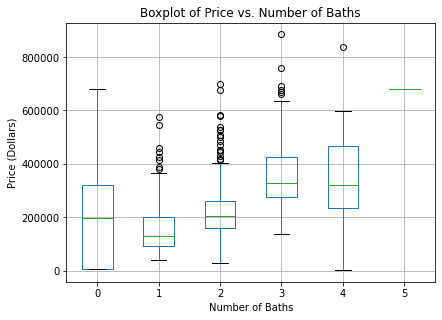

In [12]:
re_transactions.boxplot(column='price', by='baths')
plt.ylabel('Price (Dollars)')
plt.xlabel('Number of Baths')
plt.suptitle('')
plt.title('Boxplot of Price vs. Number of Baths')

Text(0.5, 1.0, 'Boxplot of Price vs. Empty lot Boolean')

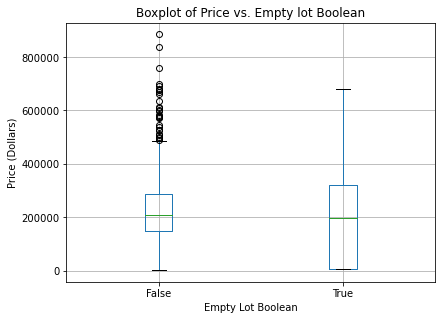

In [13]:
re_transactions.boxplot(column='price', by='empty_lot')
plt.ylabel('Price (Dollars)')
plt.xlabel('Empty Lot Boolean')
plt.suptitle('')
plt.title('Boxplot of Price vs. Empty lot Boolean')

Text(0.5, 1.0, 'Boxplot of Price vs. Street Type')

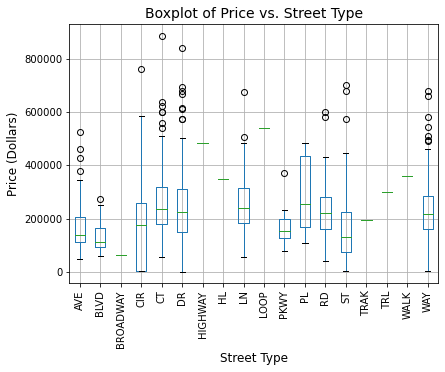

In [14]:
re_transactions.boxplot(column='price', by='street_type')
plt.xticks(rotation=90)
plt.ylabel('Price (Dollars)', fontsize=12)
plt.xlabel('Street Type', fontsize=12)
plt.suptitle('')
plt.title('Boxplot of Price vs. Street Type', fontsize=14)

### Describing categorical variables as predictive of price or not:
- Scale: **-- | - | 0 | + | ++**
  - **--** is not predictive at all, **0** is indifferent, **++** is very predictive
  
  

- City: **+**
  - The city variable is somewhat predictive as several of the cities have distinguishable interquartile ranges with a small amount of standard deviation that shows noticeable differences in prices between cities. However, several cities also have large 1st and 3rd quartiles with several outliers that doesn't inspire confidence in the city variable as a predictive indicator of price.
- Zip Code: **+**
  - The zip variable is somewhat predictive as many of the zip codes have distinguishable interquartile ranges with a small amount of standard deviation that shows noticeable differences in prices between zip codes. However, many zip code also have large 1st and 3rd quartiles with several outliers that doesn't inspire confidence in the zip code variable as a predictive indicator of price.
- State: **--**
  - The State variable is not predictive at all. This is because all entries have the same value for the state variable, as such it offers no differentiation across entries to predict the price variable by.
- Type: **+**
  - The Type variable is somewhat predictive. This is because for the Condo and Multi-Family types, the box plot indicates that these properties will be very likely be less than 400,000 dollars, and that Multi-Family homes will usually be more expensive than condos. However, across all of the types the average price is very similar and all of the interquartile ranges overlap.
- Beds: **+**
  - The number of beds is somewhat predictive. This is due to the fact that there appears to be somewhat of a positive linear relationship between the number of beds and the price of the home. However, most all of the bed values have overlapping quartiles, meaning given a number of beds you cannot say with certainty how much the property is worth.
- Baths: **+**
  - The number of baths is somewhat predictive. This is due to the fact that there appears to be somewhat of a positive linear relationship between the number of baths and the price of the home. However, most all of the bath values have overlapping quartiles, meaning given a number of baths you cannot say with certainty how much the property is worth.
- Empty Lot: **--**
  - The empty_lot variable is not predictive at all. This due to the fact that both possible values for this variable have approximately the same average, and also have overlapping interquartile ranges. These factors make is very difficult to determine price provided an empty_lot value.
- Street type: **0**
  - The street_type variable is indifferent in its predictive capabilities. This is because for the street types, most all of the box plots have over lapping quartiles and do not separate by price very well. However, some street_type's like *PKWY* have a fairly tight interquartile range that lends confidence in a price predictions for other properties on Parkways.

## Part II: Classification on Property Type
###  Box plotting continuous variables versus property type:

Text(0.5, 1.0, 'Boxplot of Square Feet vs. Type of Real estate')

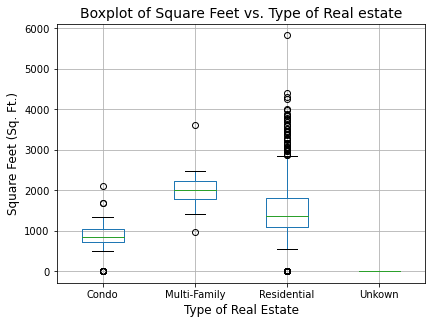

In [15]:
re_transactions.boxplot(column='sq__ft', by='type')
plt.ylabel('Square Feet (Sq. Ft.)', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.suptitle('')
plt.title('Boxplot of Square Feet vs. Type of Real estate', fontsize=14)

Text(0.5, 1.0, 'Boxplot of Price vs. Type of Real estate')

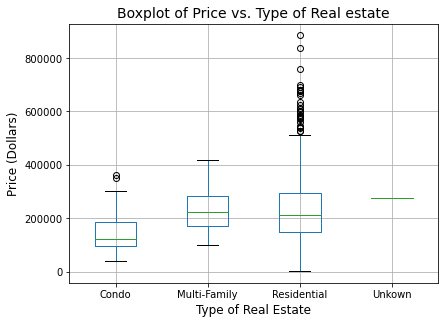

In [16]:
re_transactions.boxplot(column='price', by='type')
plt.ylabel('Price (Dollars)', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.suptitle('')
plt.title('Boxplot of Price vs. Type of Real estate', fontsize=14)

Text(0.5, 1.0, 'Boxplot of Latitude vs. Type of Realestate')

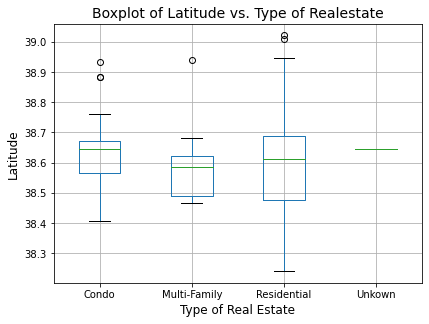

In [17]:
re_transactions.boxplot(column='latitude', by='type')
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.suptitle('')
plt.title('Boxplot of Latitude vs. Type of Realestate', fontsize=14)

Text(0.5, 1.0, 'Boxplot of Longitude vs. Type of Realestate')

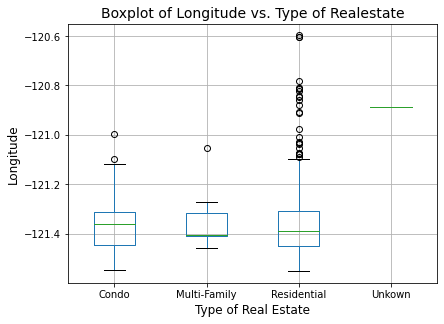

In [18]:
re_transactions.boxplot(column='longitude', by='type')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.suptitle('')
plt.title('Boxplot of Longitude vs. Type of Realestate', fontsize=14)

### Describing continuous variables as predictive of type or not:
- Scale: **-- | - | 0 | + | ++**
  - **--** is not predictive at all, **0** is indifferent, **++** is very predictive
  
  
- Square Feet: **+**
  - The square feet of the home is somewhat predictive of the type of the real estate. This is due to the fact that the Condo, Multi-Family, and Residential types all have distinguishable interquartile ranges that do not over lap. However, square feet is not the best predictive variable due to the fact that quartiles do overlap across these values and also due to the number of outliers that the Residential type has.
- Price: **+**
  - The price variable is somewhat predictive. Types of properties do have overlapping interquartile ranges which takes away from the accuracy of price’s predictive power. However, this variable can be used to generally separate Condos from Multi-Family and Residential types of real estate due to its comparatively lower average price.
- Latitude: **--**
  - Latitude is not predictive of the type of real estate at all. The reason for this is that the quartiles created for each type have a large amount of overlap across types, making distinguishing the type by only knowing the latitude very difficult.
- Longitude: **--**
  - Latitude is not predictive of the type of real estate at all. The reason for this is that the quartiles created for each type have a large amount of overlap across types, making distinguishing the type by only knowing the latitude very difficult.

### Creating heat maps of categorical variables vs. the type of real estate.
- **Note:** Not all combinations of categorical variables had record of existing in the data set. So to represent this, a fill value of 0 was used in these situations to convey that 0 occurances of this combination was observed in the data set.

Text(0.5, 1.0, 'Heatmap of City vs. Type of Real estate')

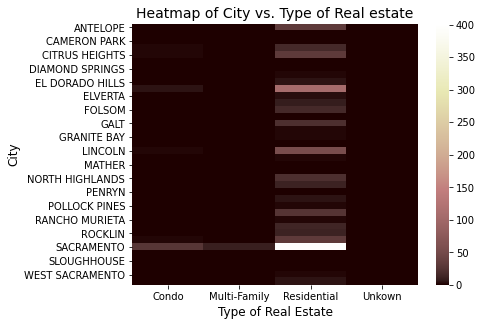

In [19]:
city_type_count = re_transactions[['city', 'type']].groupby(
    ['city', 'type']).size().unstack(-1).fillna(0)
sns.heatmap(city_type_count, cmap='pink')
plt.ylabel('City', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.title('Heatmap of City vs. Type of Real estate', fontsize=14)

Text(0.5, 1.0, 'Heatmap of Zip Code vs. Type of Real estate')

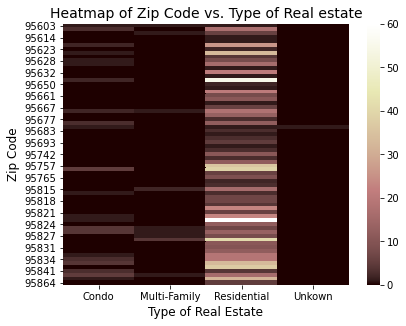

In [20]:
city_type_count = re_transactions[['zip', 'type']].groupby(
    ['zip', 'type']).size().unstack(-1).fillna(0)
sns.heatmap(city_type_count, cmap='pink')
plt.ylabel('Zip Code', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.title('Heatmap of Zip Code vs. Type of Real estate', fontsize=14)

Text(0.5, 1.0, 'Heatmap of State vs. Type of Real estate')

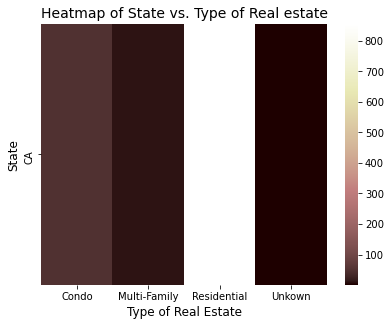

In [21]:
city_type_count = re_transactions[['state', 'type']].groupby(
    ['state', 'type']).size().unstack(-1).fillna(0)
sns.heatmap(city_type_count, cmap='pink')
plt.ylabel('State', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.title('Heatmap of State vs. Type of Real estate', fontsize=14)

Text(0.5, 1.0, 'Heatmap of Number of Beds vs. Type of Real estate')

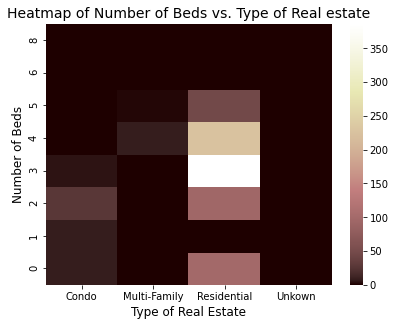

In [22]:
city_type_count = re_transactions[['beds', 'type']].groupby(
    ['beds', 'type']).size().unstack(-1).fillna(0)
ax = sns.heatmap(city_type_count, cmap='pink')
ax.invert_yaxis()
plt.ylabel('Number of Beds', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.title('Heatmap of Number of Beds vs. Type of Real estate', fontsize=14)

Text(0.5, 1.0, 'Heatmap of Number of Baths vs. Type of Real estate')

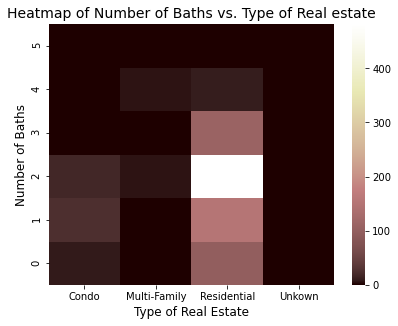

In [23]:
city_type_count = re_transactions[['baths', 'type']].groupby(
    ['baths', 'type']).size().unstack(-1).fillna(0)
ax = sns.heatmap(city_type_count, cmap='pink')
ax.invert_yaxis()
plt.ylabel('Number of Baths', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.title('Heatmap of Number of Baths vs. Type of Real estate', fontsize=14)

Text(0.5, 1.0, 'Heatmap of Empty Lot Boolean vs. Type of Real estate')

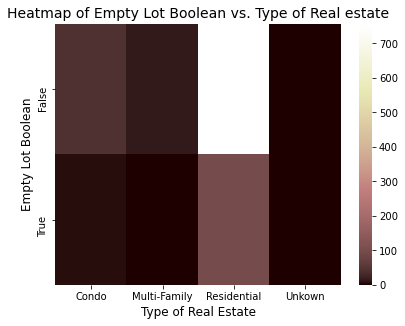

In [24]:
city_type_count = re_transactions[['empty_lot', 'type']].groupby(
    ['empty_lot', 'type']).size().unstack(-1).fillna(0)
sns.heatmap(city_type_count, cmap='pink')
plt.ylabel('Empty Lot Boolean', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.title('Heatmap of Empty Lot Boolean vs. Type of Real estate', fontsize=14)

Text(0.5, 1.0, 'Heatmap of Street Type vs. Type of Real estate')

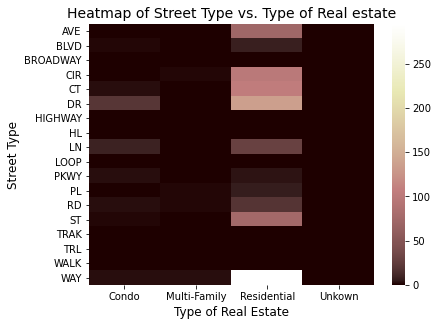

In [25]:
city_type_count = re_transactions[['street_type', 'type']].groupby(
    ['street_type', 'type']).size().unstack(-1).fillna(0)
sns.heatmap(city_type_count, cmap='pink')
plt.ylabel('Street Type', fontsize=12)
plt.xlabel('Type of Real Estate', fontsize=12)
plt.title('Heatmap of Street Type vs. Type of Real estate', fontsize=14)

### Describing categorical variables as predictive or not:
- Scale: **-- | - | 0 | + | ++**
  - **--** is not predictive at all, **0** is indifferent, **++** is very predictive
  
  
- City: **0**
  - The city variable is indifferent in its predictive capabilities of the type of real estate. The reason for this is that for the vast majority of city and type combinations, there is not many data points to differentiate between the types. However, for cities like Sacramento and El Dorado Hills there are a vast majority of Residential properties, so unlabeled types of real estate that are in those cities are also very likely Residential.
- Zip: **0**
  - The zip is indifferent in its predictive capabilities of the type of real estate. This is because the vast majority of zip codes with multiple real estate transactions are Residential, making this comparison lack power in its ability to distinguish real estate types. However, some zip codes like 95824 have mostly Residential transactions, making this zip likely to have Residential transactions in the future.
- State: **--**
  - The State variable is not predictive at all. This is because all entries have the same value for the state variable, as such it offers no differentiation across entries to predict the type variable by.
- Beds: **+**
  - The Beds variable is somewhat predictive. This is because it appears that Residential types are more likely to have more beds than Condos and even multi-family homes. However due to a lack of non-Residential types this cannot be assumed to be true all of the time.
- Baths: **+**
  - The Baths variable is somewhat predictive. This is because it appears that Residential types are more likely to have more baths than Condos and even multi-family homes. However due to a lack of non-Residential types this cannot be assumed to be true all of the time.
- Empty Lot: **-**
  - The empty_lot variable is not very predictive. The reason for this is that most all of the data is of the Residential type, without many other data points for the other types to support predictions in those categories. However, it does appear that the vast majority of the time Residential properties are not empty lots, this could be used to some degree in a predictive manor.
- Street Type: **-**
  - The street_type variable is not very predictive. The reason for this is that most all of the data is of the Residential type, without many other data points for the other types to support predictions in those categories. However, it does appear that the vast majority of the time that street types such as "Way" and "Cir" as Residential, but again there just is not enough data on the other types of real estate to be certain of this.

## Part III: Compare Predictive Variables

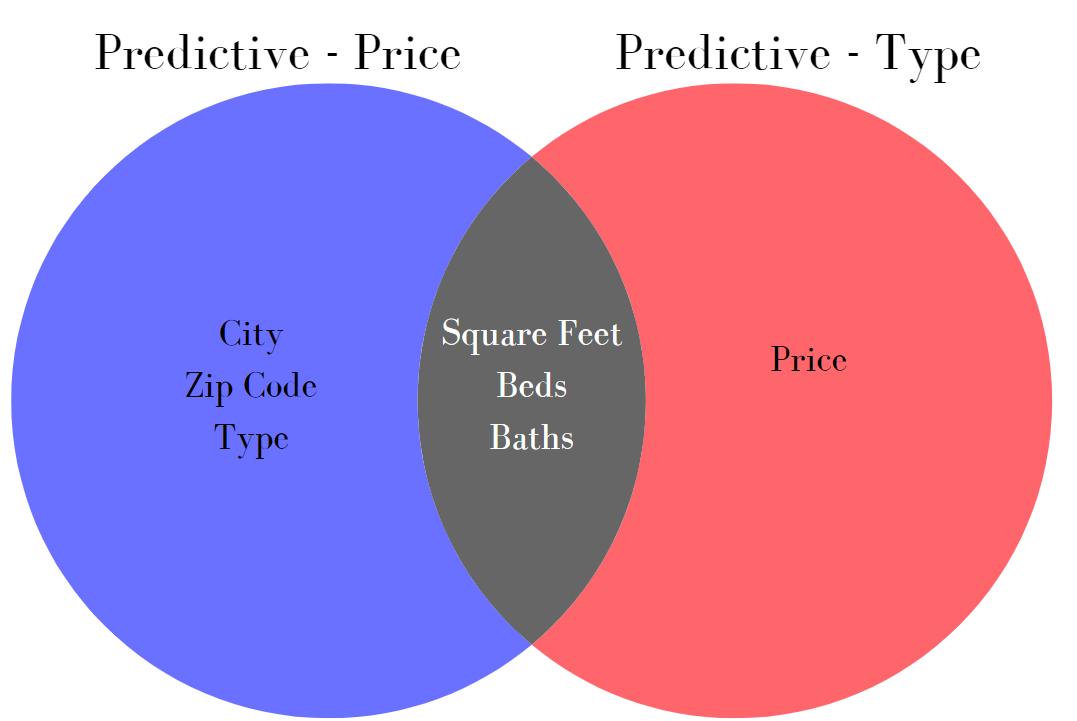

In [26]:
Image('Venn_Diagram.png')

### Analyzing predictive variables:
- **Only Predictive of Price:**
  - City:
    - City is likely correlated with price due to the fact that some cities are nicer than others. For example, buyers are willing to pay a premium if the city is safe and has good public schools, but homes are often worth less if the city is known for crime and poor public schools. City likely doesn't translate as a predictor of the type of real estate due to the size of cities, as well as the lack of non-Residential types in this data set. Size of cities is a factor because at this scale of location, one city can encompass plenty of condo buildings as well as homes.
  - Zip Code:
    - Zip Code is a good predictor of price for the same reasons mentioned as the city variable, there are nicer zip codes and there are less nice zip codes. Zip code is likely not a good predictor of the type of real estate for similar reasons as city, the area a zip code encompasses covers a wide variety of property types, and also because this data set does a poor job of representing non-residential types.
  - Type:
    - Type is likely a good predictor of price due to obvious reasons. Homes usually cost more than condos, and multi-family homes usually cost more than residential single-family homes, with outliers across the board.
- **Only Predictive of Type:**
  - Price:
    - Price is likely a good predictor of the type of real estate sold for the same reasons as mentioned immediately above. Generally, homes cost more than condos, and multi-family homes cost more than residential single-family homes.
- **Predictive of both Price and Type:**
  - Square Feet:
    - Square feet is a good predictor of the price of the home for the fact that more space in a home is desirable, and people are willing to pay premiums for features that they want. Square feet is likely a good predictor of the type of real estate due to the general rule that a condo will be smaller than a home, and a single family home will be smaller than a multi-family home.
  - Beds:
    - Beds is likely a predictor of price due to the fact that more beds usually means a larger, and often times nicer home, which results in higher real estate prices. Beds is also a predictor of the type of real estate because generally, a condo will have fewer beds than a home, and a residential single-family home will have less beds than a multi-family home.
  - Baths:
    - Baths is a good predictor of both variables due to the same reasons as the beds variable. More baths usually means a larger, and often times nicer home, which results in higher real estate prices. Also, generally, condos will have fewer baths than a home, and a residential single family home will have less baths than a multi-family home.
    
---
---

## Conclusion:
  - This lab acted as an exercise in visualizing data to convey relationships between variables, as well as used graphical representations of data to interpret and rationalize why correlations may exist between variables. This lab built off of *Lab 1: Data Cleaning* by using the resulting cleaned data set as the primary data set for this lab. Through analyzing the graphical representations of relationships between the variables in this data set, several variables were recognized for their predictive potential of the price and type variables. It was concluded that **city**, **zip**, and **type** were all reasonable predictors of the price variable, but not the type variable. It was also concluded that **price** was a reasonable predictor of the type variable. Finally it was concluded that **square_feet**, **beds**, and **baths** served as solid predictors for both the price and type variables.